# **Image denoising with robust PCA**

The aim of this notebook is to make use of the RPCA method to denoise an (artificially corrupted) image. 

Import the needed librairies

In [19]:
%reload_ext autoreload
%autoreload 2

from utils import utils_images
from classes.rpca import RPCA
from classes.improved_rpca import ImprovedRPCA, ImprovedRPCAHyperparams
from classes.noisy_rpca import NoisyRPCA, NoisyRPCAHyperparams

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.grid"] = False
import PIL.Image

We import an image we convert to a numpy array

In [6]:
img = np.asarray(PIL.Image.open('../data/clouzot.jpeg'), dtype=np.uint8)

We choose the parameters we want, i.e. the ratio of corrupted pixels we want and the parameters for the RPCA functions. The latter have to be in a dictionary. 
Then, it suffices to call the `corrupt_and_restore` function. First, this function corrupts `ratio`% of pixels of each slice of the image. Then , it applies to each corrupted layer the RPCA algorithm and spits the low-rank parts, which are concatenate to form an image. 
The similarity scores displayed are those between the original image and the corrupted one, and the original image and the restored one. 


**NOTE**: this procedure is quite slow...

In [24]:
%%time

ratio  = 0.25
noisy_image = utils_images.corrupt_image(img, ratio)

res = []
for i in range(noisy_image.shape[2]):
    _, X, _ = RPCA(D=noisy_image[:,:,i]).compute_rpca()
    res.append(X)
restored_image = np.stack(res, axis=-1).astype(np.uint8)

CPU times: user 20min 12s, sys: 4min 9s, total: 24min 22s
Wall time: 3min 34s


**plotting the results**

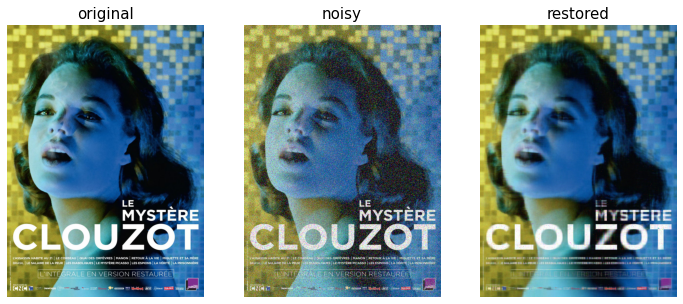

In [25]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(4*3,5))
suptitles = ["original", "noisy", "restored"]
for j, (i,t) in enumerate(zip([img, noisy_image, restored_image], suptitles)):
    ax[j].imshow(i, aspect='auto')
    ax[j].set_title(t, fontsize=15)
    ax[j].axis("off")
plt.show()

There are of course some limitations with this method. For instance, one observes the letters are poorly recovered... 
However, without any training, it is possible to denoise, *to some extent*, a corrupted image.  